In [1]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)



from skimage.measure import block_reduce
import numpy as np

import logging
import pickle
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, font_scale=2, style="whitegrid", palette="muted")
from notebook_utils import plot 


from model import base, provider, heatmap_evaluation
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

In [4]:
dataset_loader.load('fashion-mnist-3-items')

In [5]:
def plot_heatmaps(_model, dataset, seq):
    if _model == 'shallow':
        model = 's2'
    elif _model == 'deep':
        model = 's3'
    elif _model == 'deepv2':
        model = 'deep_4l'
    elif _model == 'convdeep':
        model = 'convdeep_4l'

    model_path = '.%s' % provider._model_path(model, dataset, seq)
    print(model_path)
    plot.plot_relevance_methods(model_path, dataset_loader, only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

# Architectures
![](https://i.imgur.com/dHN4N3b.png)

# Experiment 1 : concatenated mnists with correct class in the middle
![image.png](https://i.imgur.com/zgmxPZl.png)

## Heatmaps of MNIST

../final-models/s2_network-mnist-3-digits-seq-12


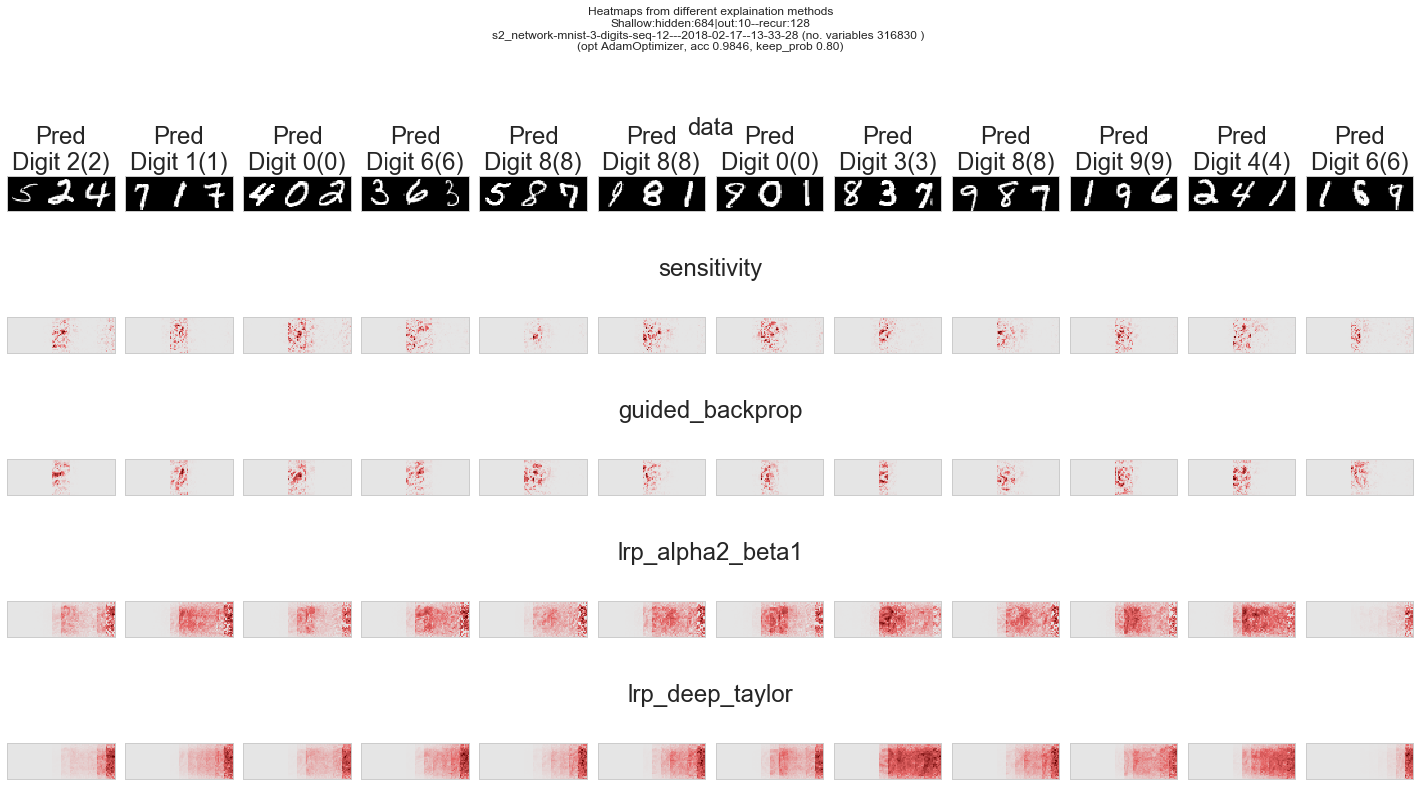

In [6]:
plot_heatmaps('shallow', 'mnist-3-digits', 12)

../final-models/s3_network-mnist-3-digits-seq-12


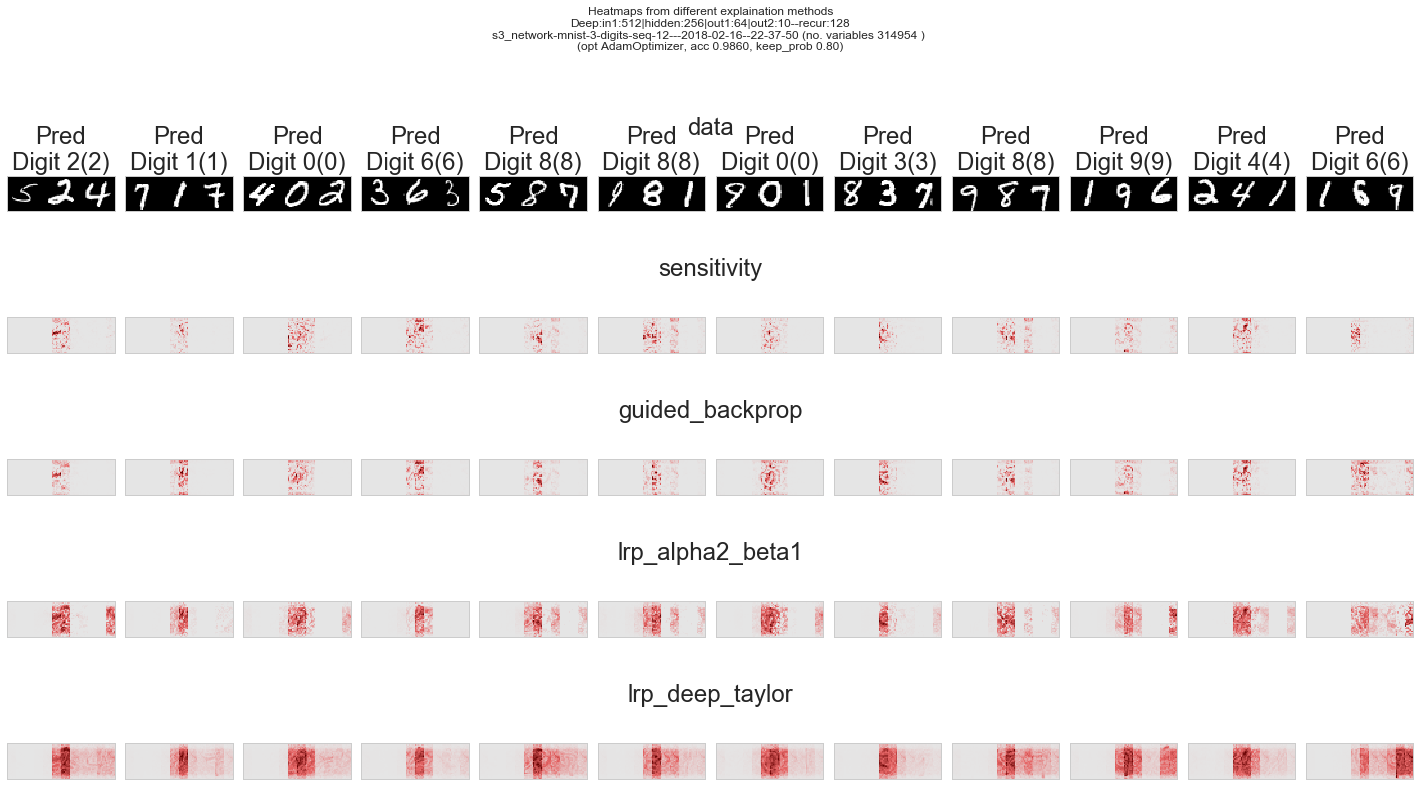

In [7]:
plot_heatmaps('deep', 'mnist-3-digits', 12)

../final-models/deep_4l_network-mnist-3-digits-seq-12


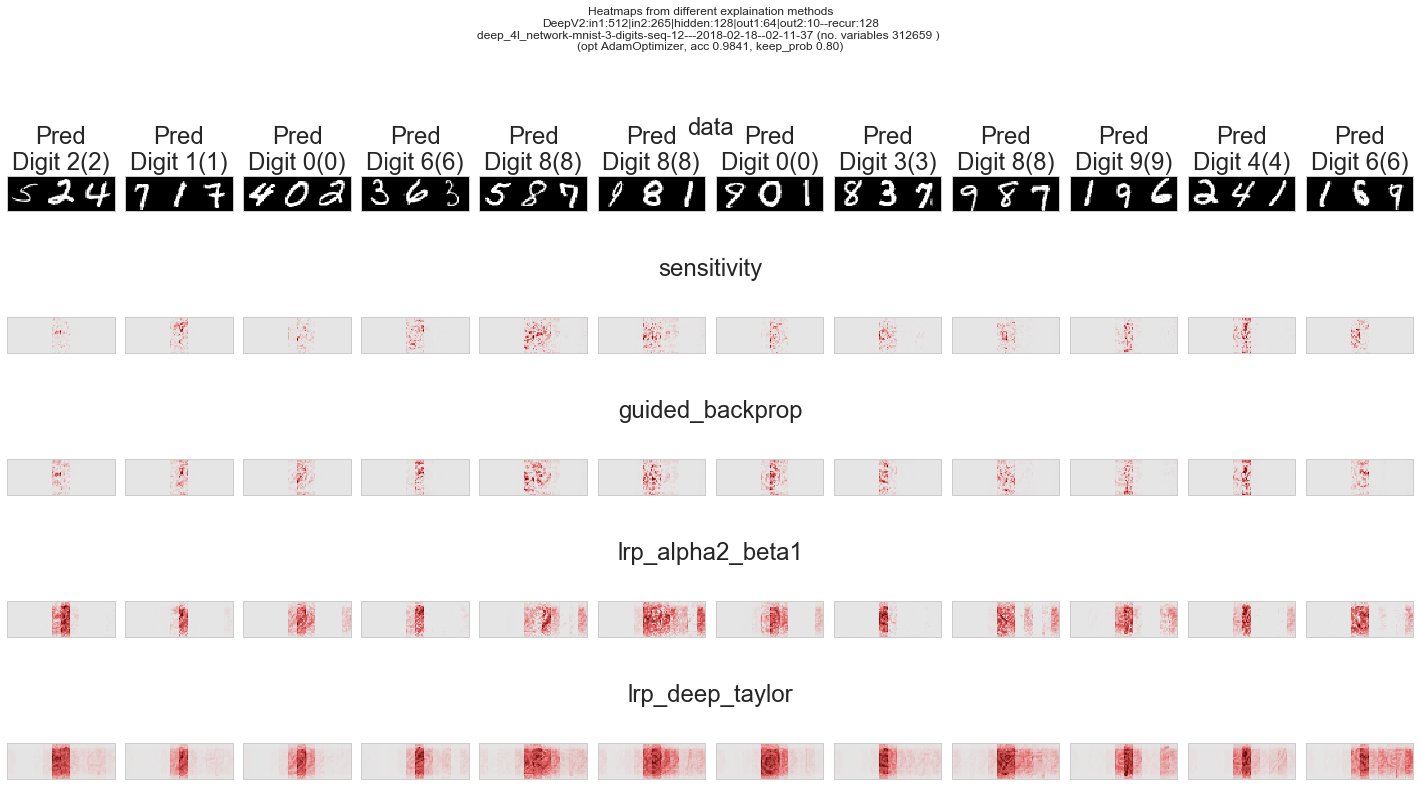

In [8]:
plot_heatmaps('deepv2', 'mnist-3-digits', 12)

../final-models/convdeep_4l_network-mnist-3-digits-seq-12


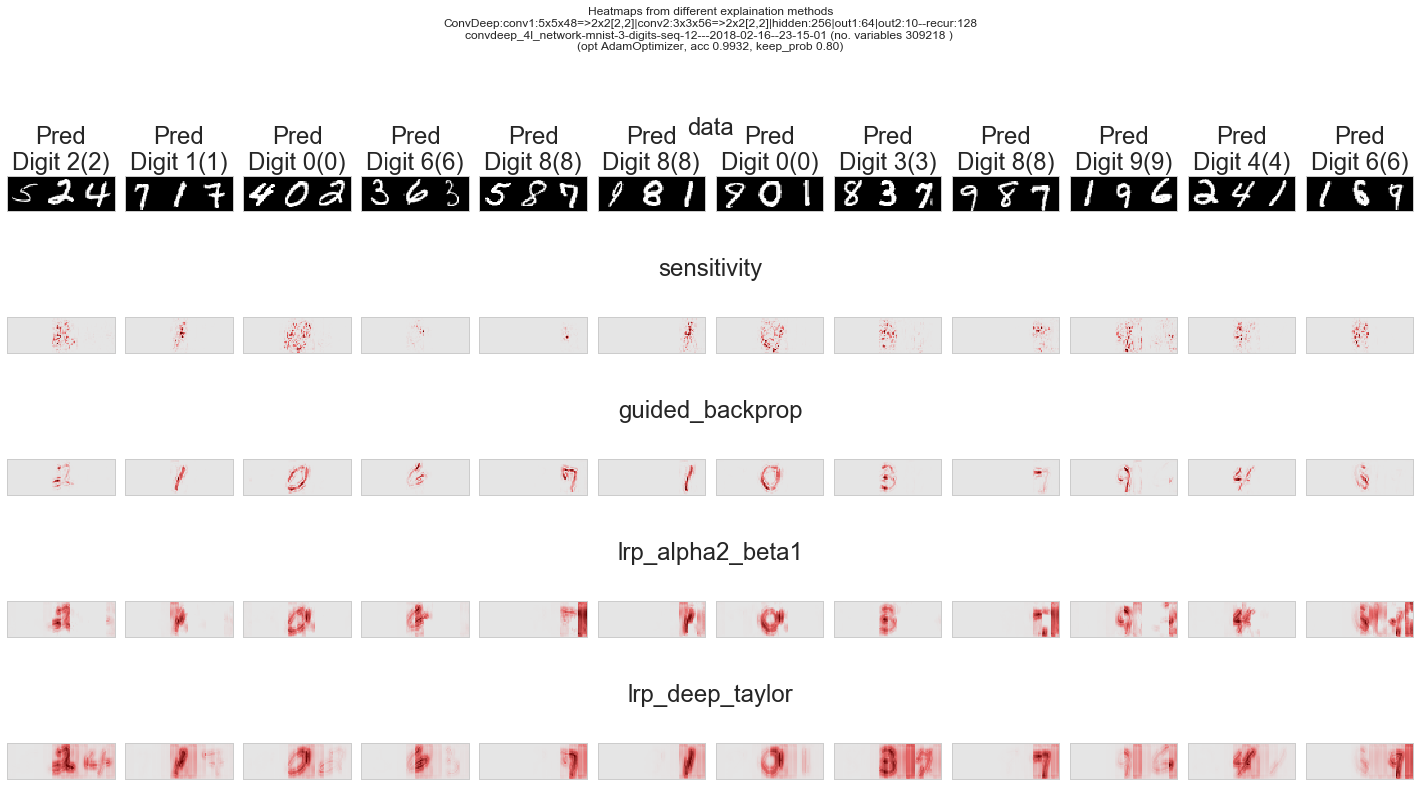

In [9]:
plot_heatmaps('convdeep', 'mnist-3-digits', 12)

## Heatmaps of FashionMNIST

../final-models/s2_network-fashion-mnist-3-items-seq-12


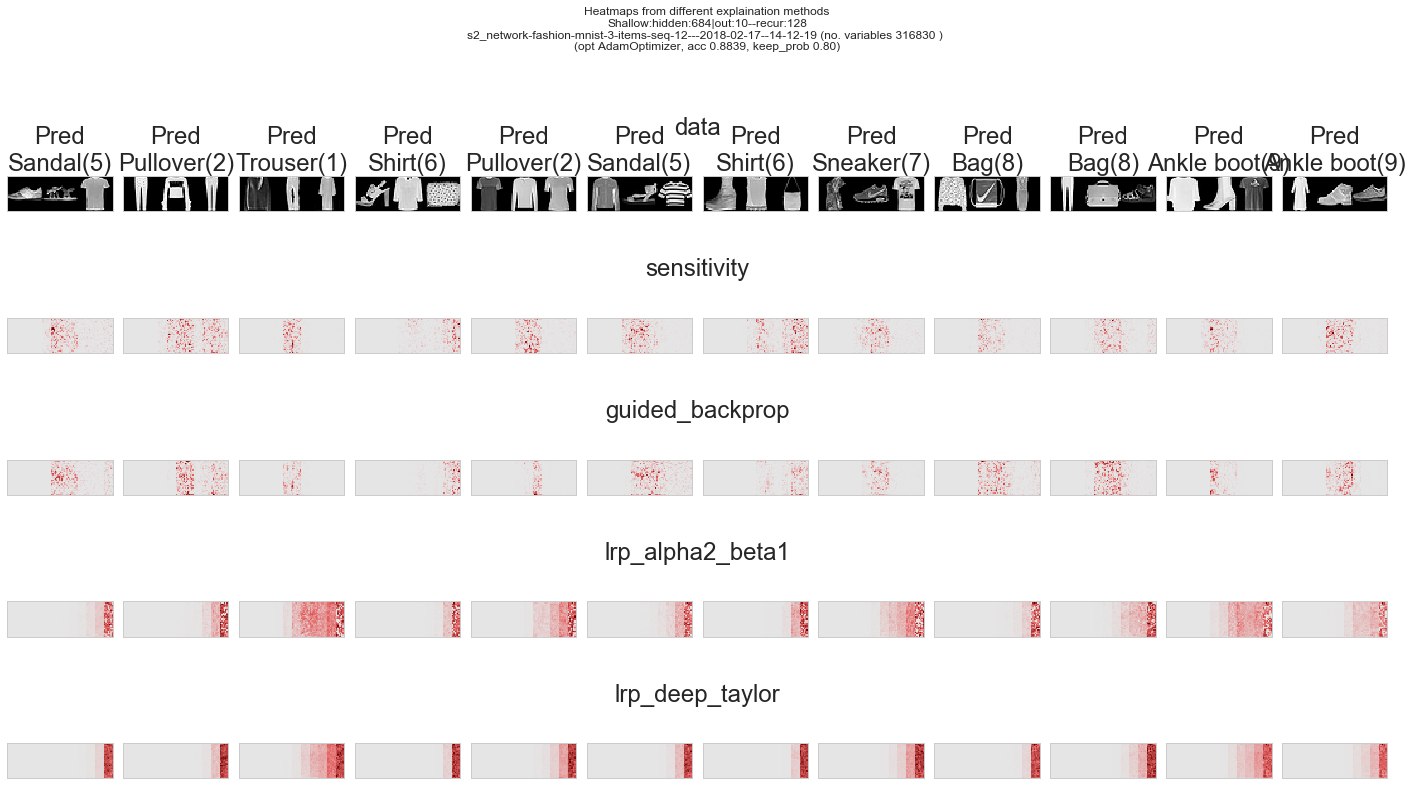

In [10]:
plot_heatmaps('shallow', 'fashion-mnist-3-items', 12)

../final-models/s3_network-fashion-mnist-3-items-seq-12


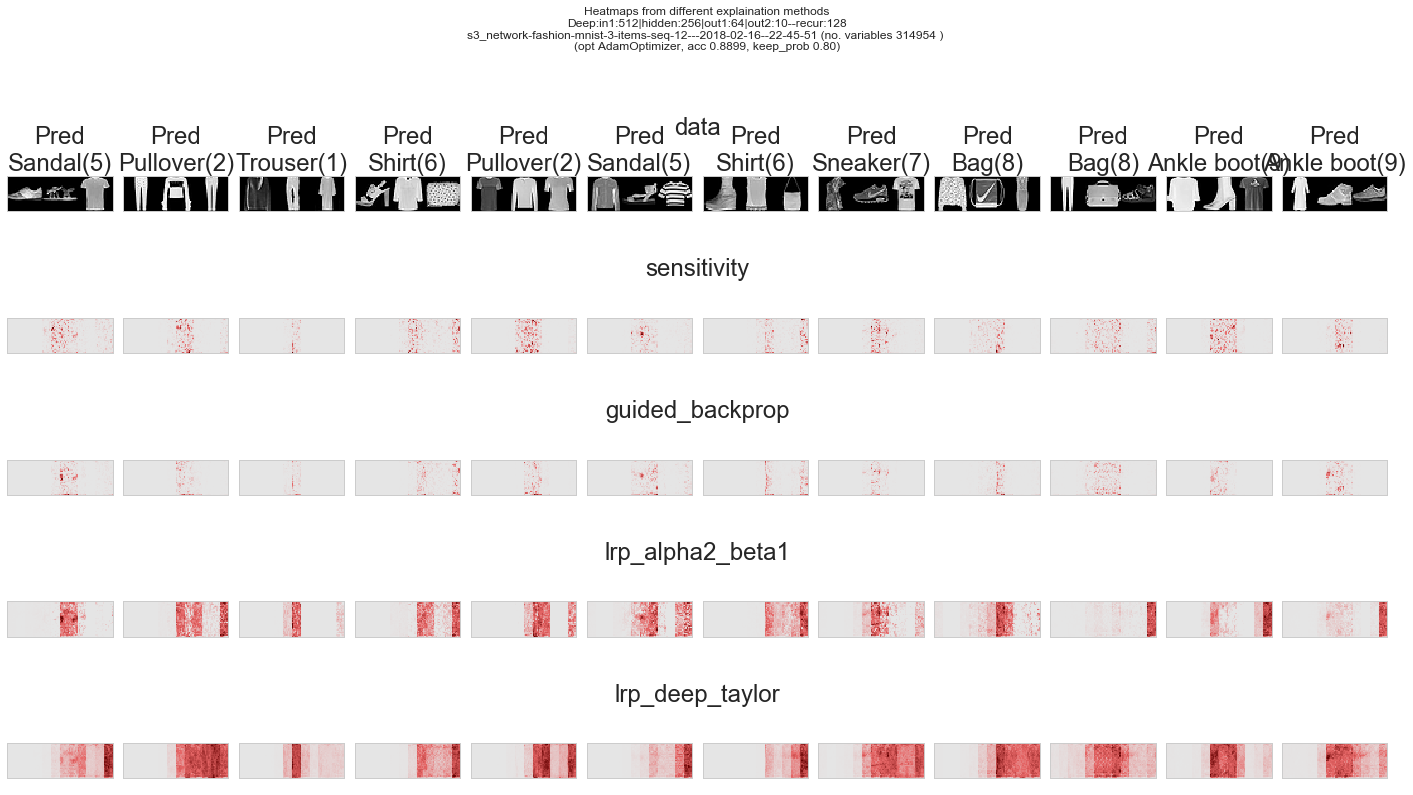

In [11]:
plot_heatmaps('deep', 'fashion-mnist-3-items', 12)

../final-models/deep_4l_network-fashion-mnist-3-items-seq-12


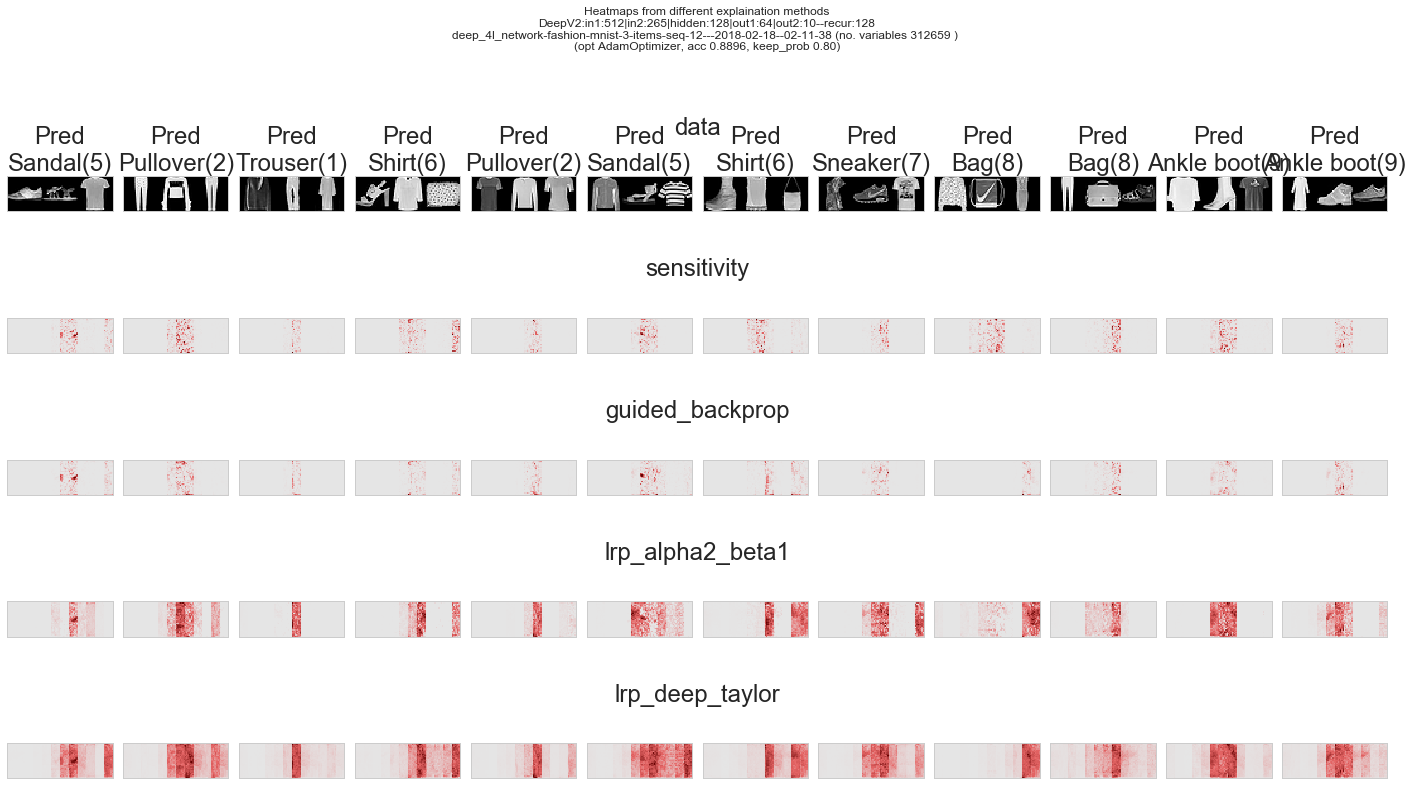

In [12]:
plot_heatmaps('deepv2', 'fashion-mnist-3-items', 12)

../final-models/convdeep_4l_network-fashion-mnist-3-items-seq-12


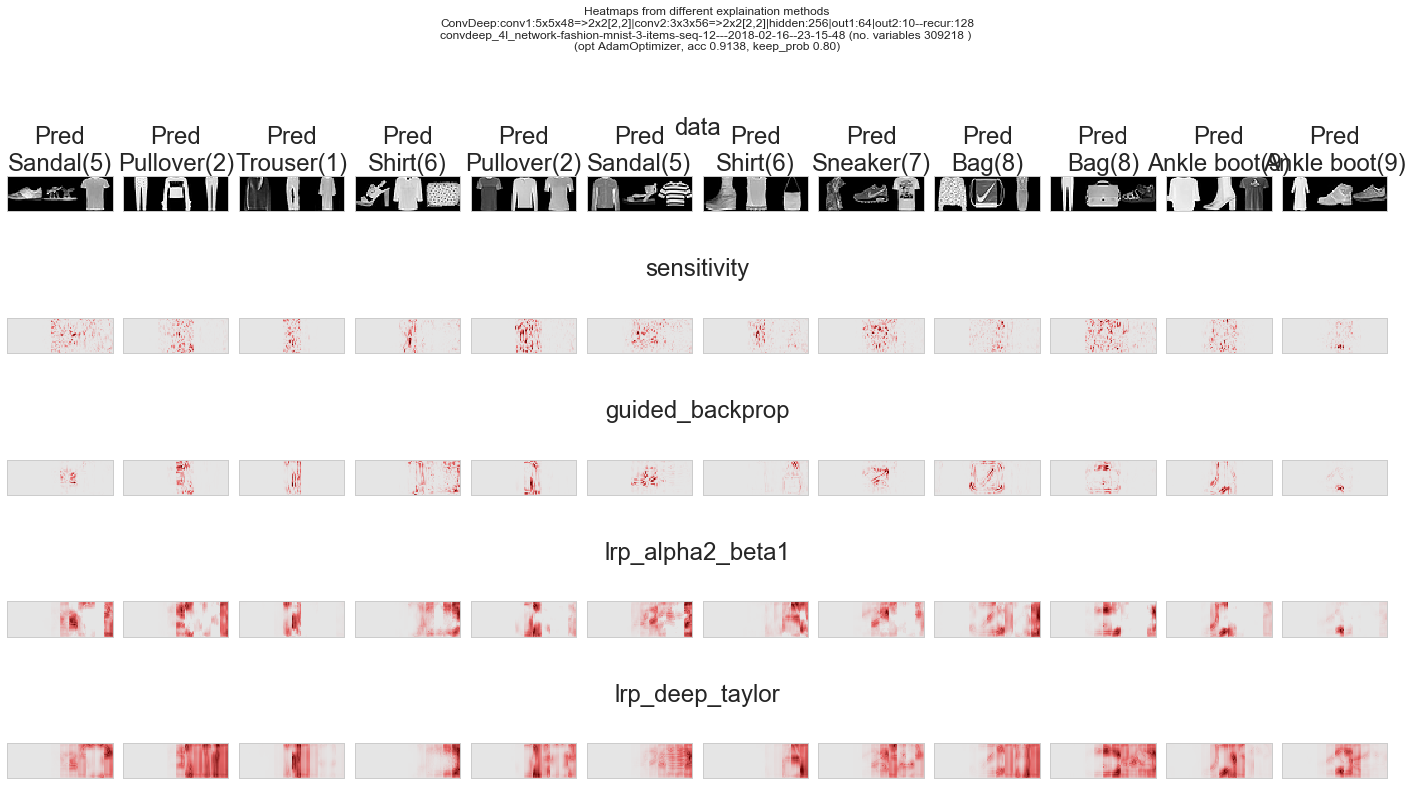

In [13]:
plot_heatmaps('convdeep', 'fashion-mnist-3-items', 12)

## Relevance Distributions

[]


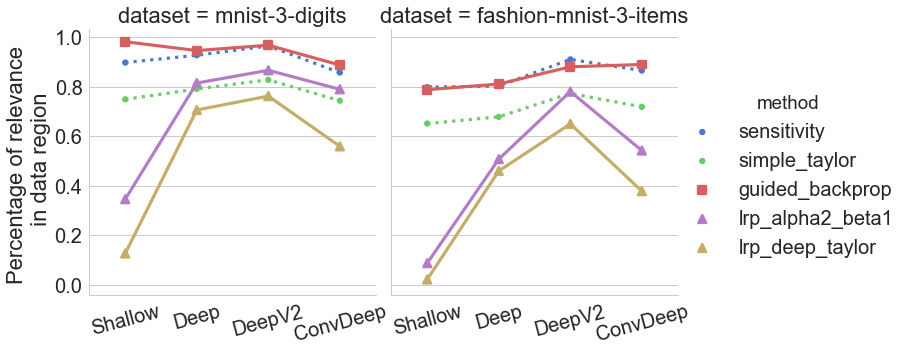

In [44]:
def plot_relevance_dist_in_middle_region(datasets=['mnist-3-digits'], seq=12, methods=['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor']):
    results = []
    print(results)
    for dataset in datasets:
        for model in ['s2', 's3', 'deep_4l', 'convdeep_4l']:
#             print(model)
            file = "../stats/rel-dist-%s-seq-%d-%s.pkl" % (dataset, seq, model)
            try:
#                 print('getting data from %s' % file)
                results = results + pickle.load(open(file, "rb"))
            except:
                print('%s not found' % file)
#     print(results)
    df = None
    df = pd.DataFrame(results)
    df = df[df.method.isin(methods)]
    
    def get_marker_linestyle(method):
        if method == 'guided_backprop':
            mk = 's'
            ls = '-'
        elif 'lrp' in method:
            mk = '^'
            ls = '-'
        else:
            mk = '.'
            ls =':'
        return mk, ls
    marker_linestyles = [get_marker_linestyle(m) for m in methods]
    markers = [ m[0] for m in marker_linestyles ]
    linestyles = [ m[1] for m in marker_linestyles ]
    df['architecture_idx'] = df['architecture'].apply(plot.architecture_idx)

    col_name = 'Percentage of relevance \n in data region'
    df[col_name] = df['rel_dist_in_data_region']

    for c in [col_name]:

        g = sns.factorplot(x="architecture_idx", y=c, col='dataset', hue="method",
                           data=df, size=5, markers=markers,
                           linestyles=linestyles)

        g.set_xticklabels(['Shallow', 'Deep', 'DeepV2', 'ConvDeep'], rotation=15)
        g.set(xlabel='')
    return df
plot_relevance_dist_in_middle_region(['mnist-3-digits', 'fashion-mnist-3-items'])

plt.savefig('rel-dist-3digits.pdf')

## Model Accuracy

In [15]:
plot.show_model_accuracy('mnist-3-digits', seqs=[12])

mnist-3-digits accuracy


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.9846,0.986,0.9841,0.9932


In [16]:
plot.show_model_accuracy('fashion-mnist-3-items', seqs=[12])

fashion-mnist-3-items accuracy


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.8839,0.8899,0.8896,0.9138


# Experiment 2 :  concatenated mnists with correct class having 2 digits
![](https://i.imgur.com/RMk0gQN.png)

## Heatmaps of MNIST

../final-models/s2_network-mnist-3-digits-maj-seq-12


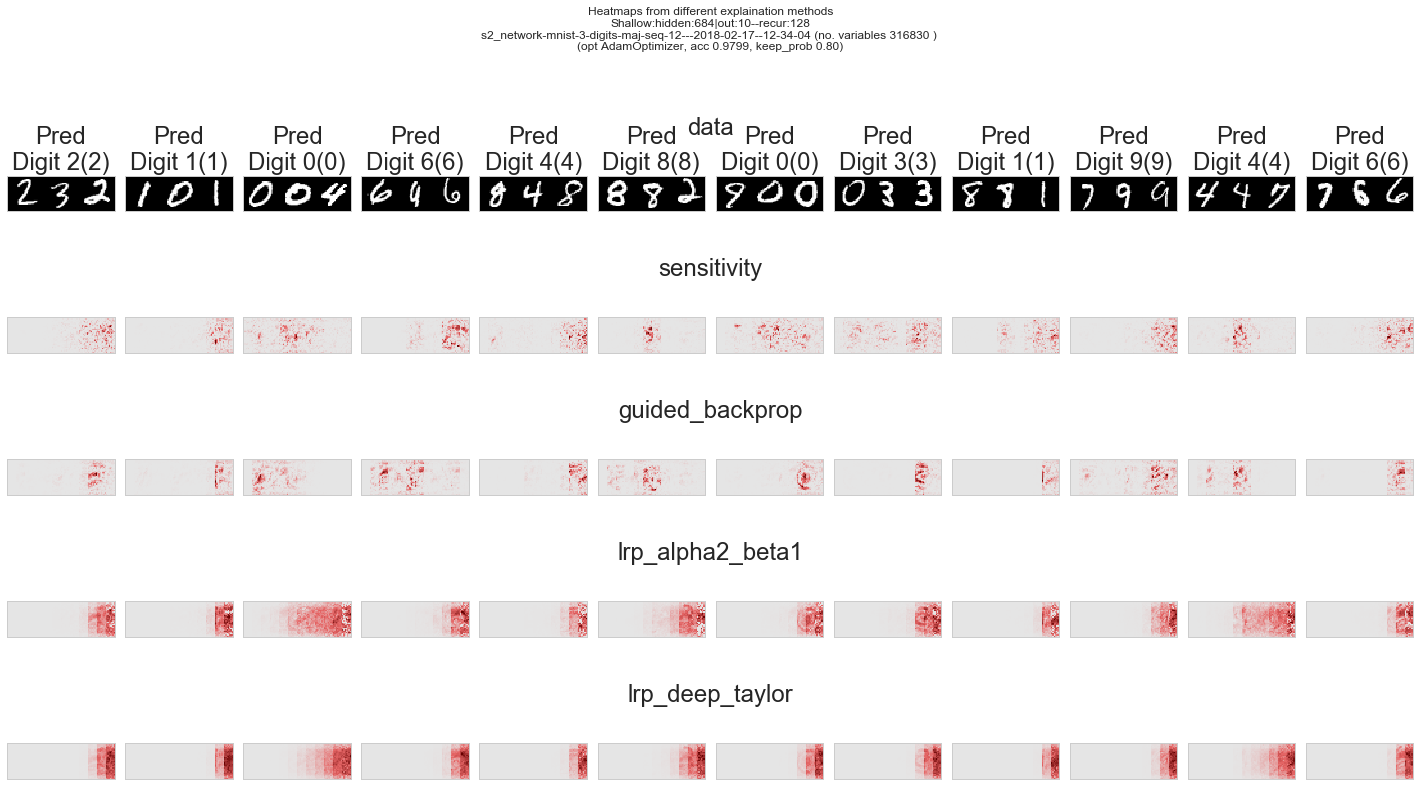

In [17]:
plot_heatmaps('shallow', 'mnist-3-digits-maj', 12)

../final-models/s3_network-mnist-3-digits-maj-seq-12


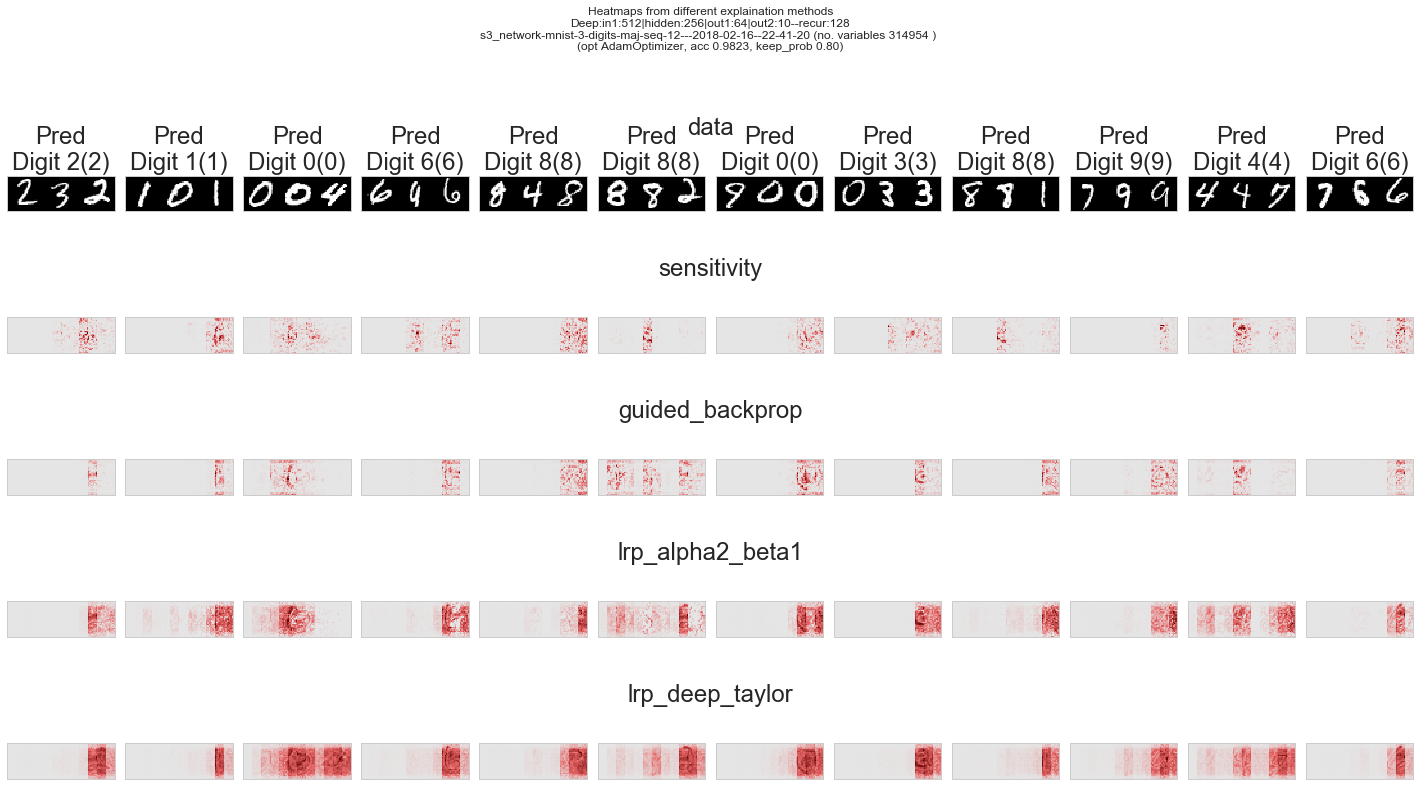

In [18]:
plot_heatmaps('deep', 'mnist-3-digits-maj', 12)

../final-models/deep_4l_network-mnist-3-digits-maj-seq-12


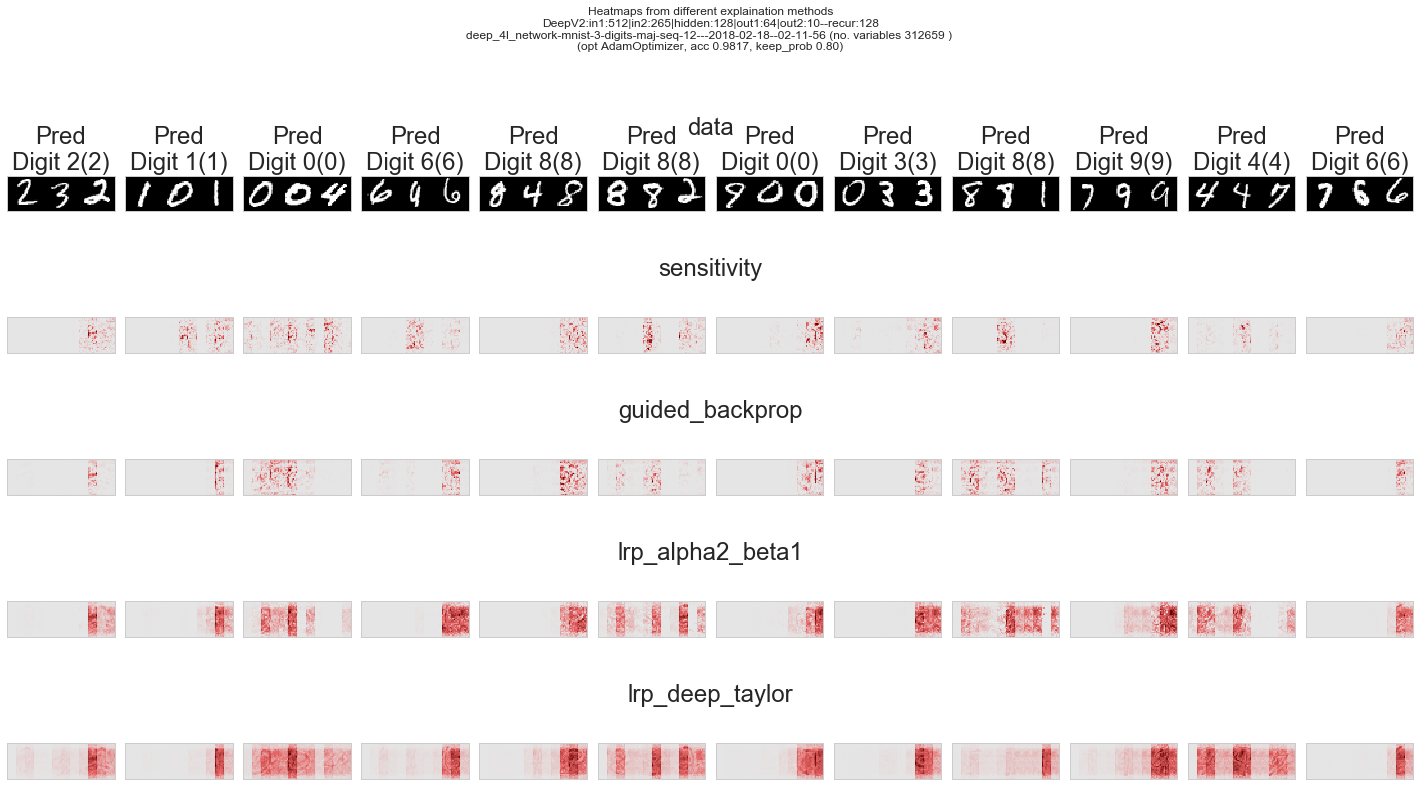

In [19]:
plot_heatmaps('deepv2', 'mnist-3-digits-maj', 12)

../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12


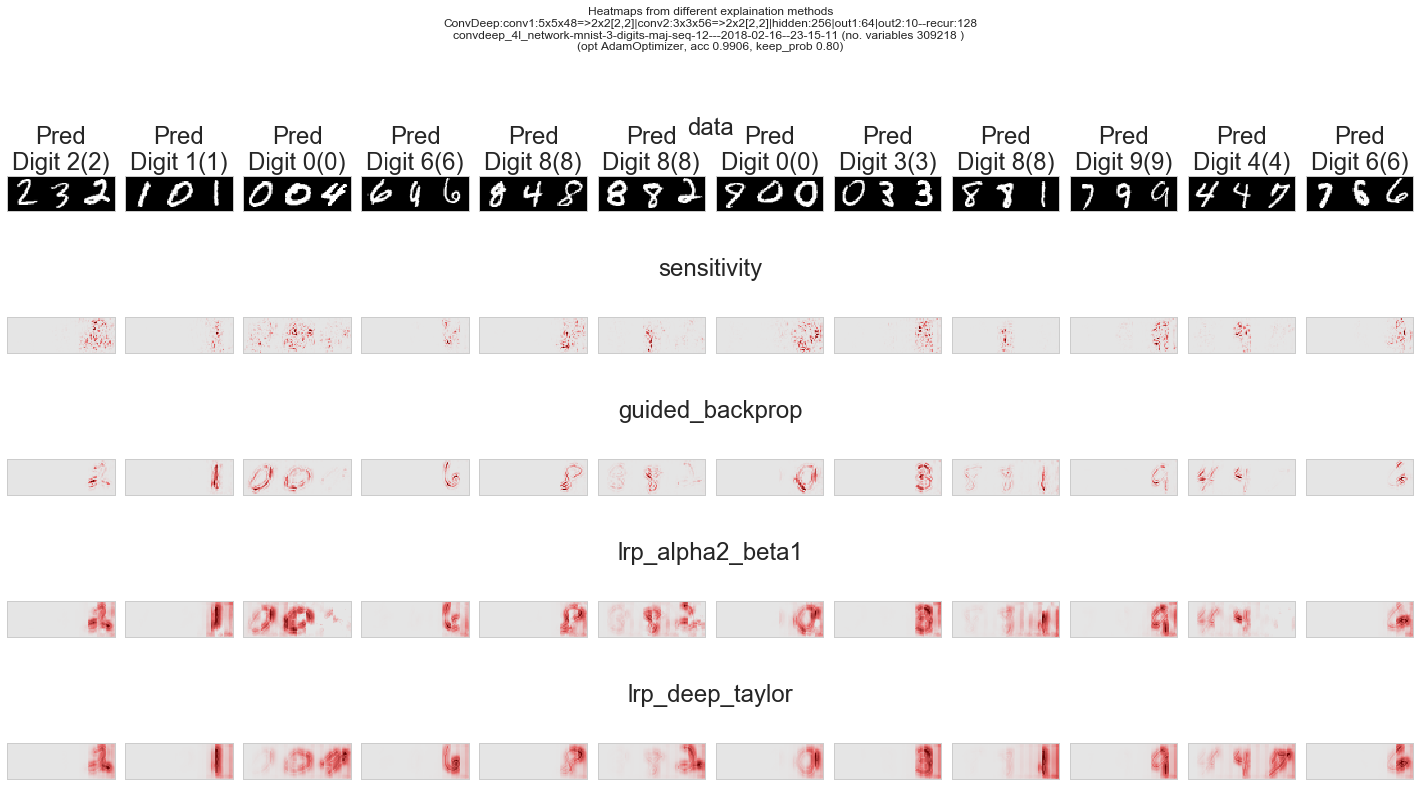

In [20]:
plot_heatmaps('convdeep', 'mnist-3-digits-maj', 12)

## Heatmaps of FashionMNIST

../final-models/s2_network-fashion-mnist-3-items-maj-seq-12


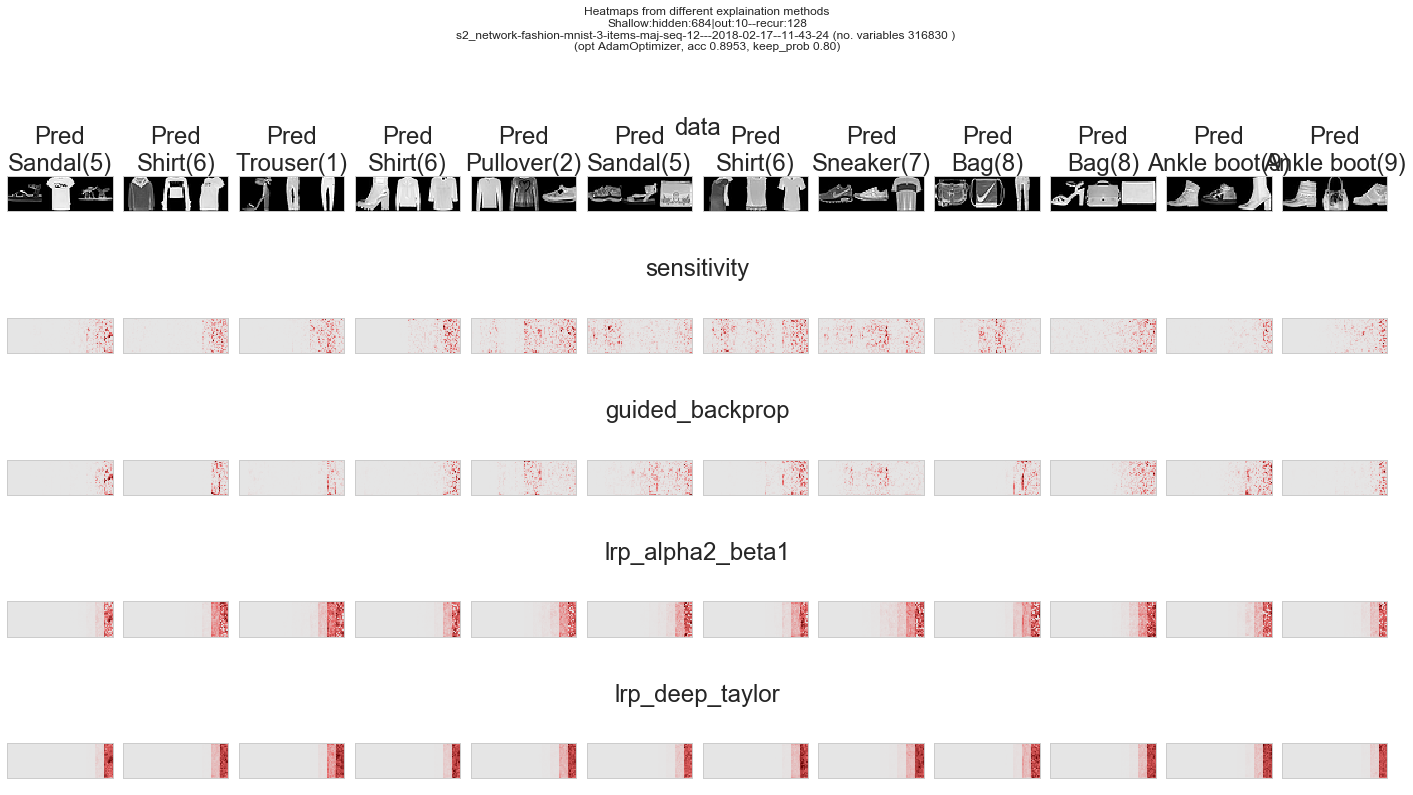

In [21]:
plot_heatmaps('shallow', 'fashion-mnist-3-items-maj', 12)

../final-models/s3_network-fashion-mnist-3-items-maj-seq-12


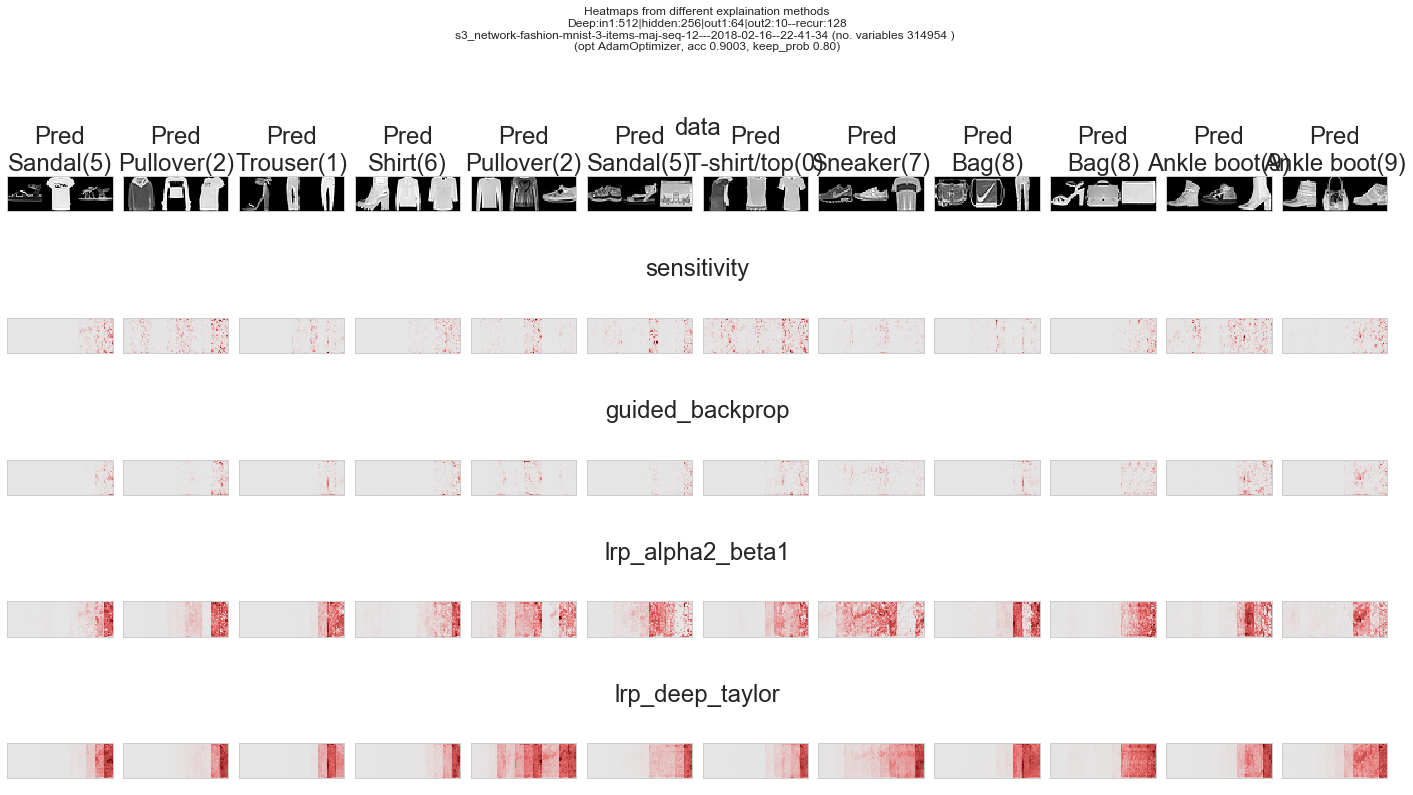

In [22]:
plot_heatmaps('deep', 'fashion-mnist-3-items-maj', 12)

../final-models/deep_4l_network-fashion-mnist-3-items-maj-seq-12


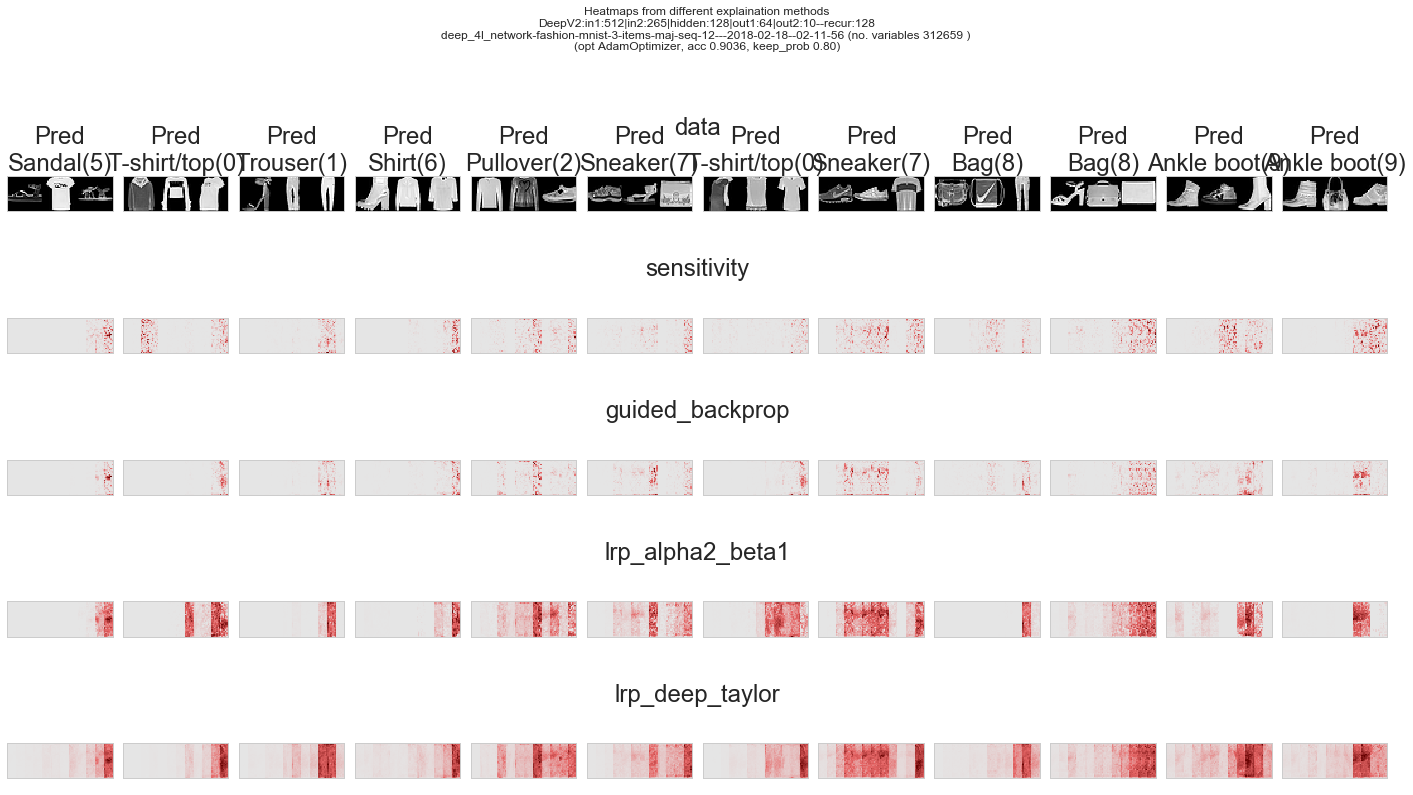

In [23]:
plot_heatmaps('deepv2', 'fashion-mnist-3-items-maj', 12)

../final-models/convdeep_4l_network-fashion-mnist-3-items-maj-seq-12


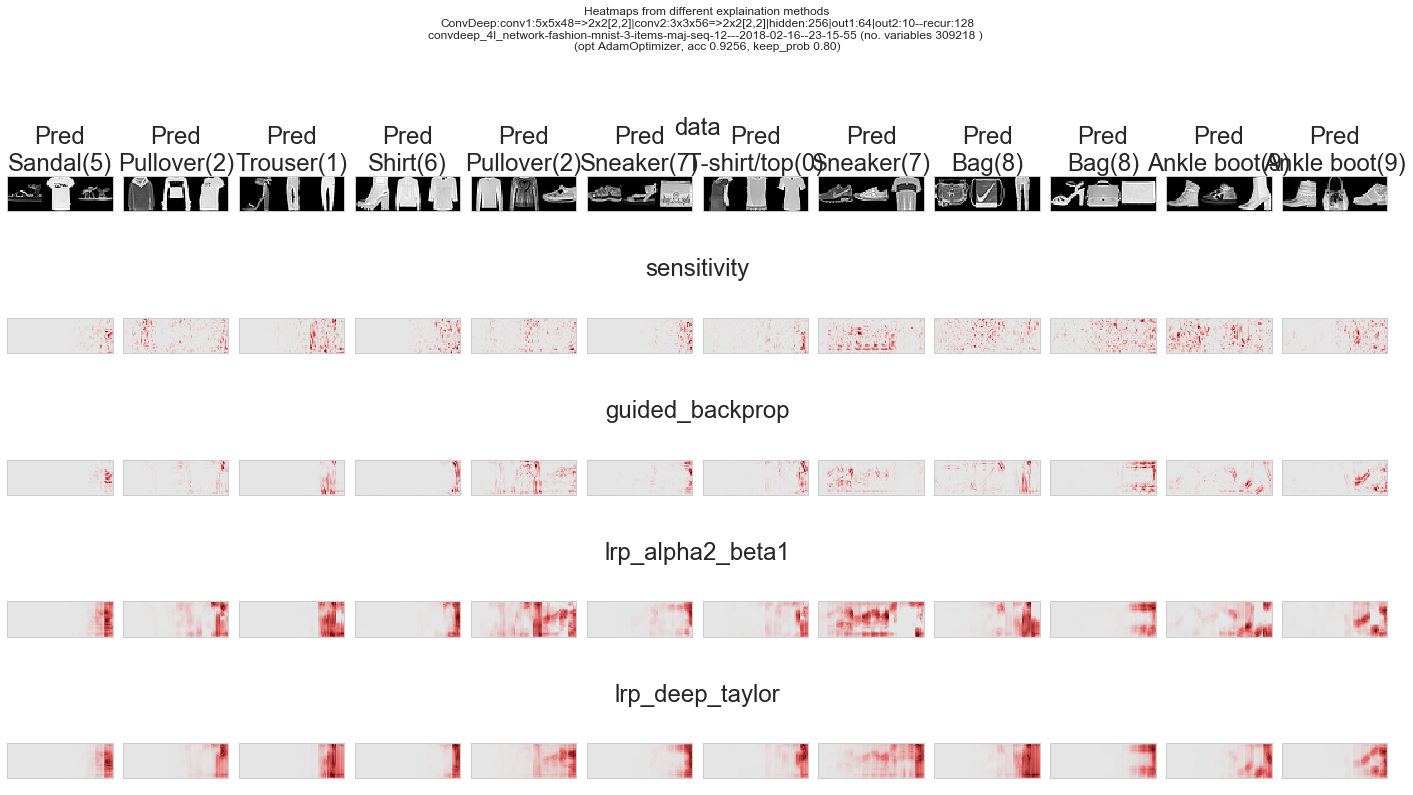

In [24]:
plot_heatmaps('convdeep', 'fashion-mnist-3-items-maj', 12)

## Relevance Distributions

[]


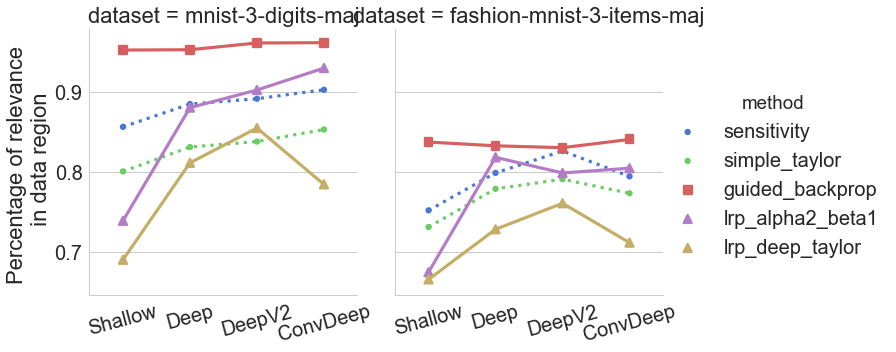

In [48]:
plot_relevance_dist_in_middle_region(['mnist-3-digits-maj', 'fashion-mnist-3-items-maj'])
pass

## Model Accuracy

In [26]:
plot.show_model_accuracy('mnist-3-digits-maj', seqs=[12])

mnist-3-digits-maj accuracy


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.9799,0.9823,0.9817,0.9906


In [27]:
plot.show_model_accuracy('fashion-mnist-3-items-maj', seqs=[12])

fashion-mnist-3-items-maj accuracy


,seq,Shallow,Deep,DeepV2,ConvDeep
0,12,0.8953,0.9003,0.9036,0.9256
